# Describing Distributions (Practice)

<p><br>In this assignment, you will be analyzing &amp; visualizing several features in the <a href="https://drive.google.com/file/d/1q0A-79PK23j9uF_gqgBdoXsV52Z47Mr9/view?usp=sharing" target="_blank">Medical Dataset.</a> </p>
<p><u>The features to analyze: </u></p><ul><li>VitD_levels</li><li>Doc_visits</li><li>TotalCharge</li></ul>
<p><strong>For each feature listed:</strong><br></p>
<ol><li>Plot a histogram with a kde (kernel density estimate)<ol><li>Add a line for the mean (red)</li><li>Add a line for the median (green)</li><li>Add a line for for +1 std from the mean (black)</li><li>Add a line for the - 1 std from the mean (black)</li><li>Highlight the range between +1 and =1 std (yellow)</li></ol></li><li>Answer the following questions:<ul><li>Is it Discrete or Continuous?</li><li>Does it have a skew? If so, which direction (+/-)</li><li>What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)</li></ul></li></ol>
<p><br></p>

# Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
df = pd.read_csv('Data/medical_data.csv')
df

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,VA,37.13892,-81.06430,Suburban,3.0,23,37655.11,Separated,Male,0,...,1.0,0.0,0.0,0.0,1,0,Blood Work,1.669799,2747.196682,8480.414406
996,MI,42.20472,-83.20589,Urban,2.0,76,33475.93,Divorced,Male,0,...,NaN,1.0,1.0,1.0,0,1,Intravenous,11.917145,3661.760740,25260.816290
997,AZ,35.04266,-110.32518,Urban,0.0,67,21360.91,Married,Male,0,...,1.0,1.0,0.0,0.0,0,0,Intravenous,30.858920,5259.932456,22317.047440
998,NC,36.11344,-80.63370,Suburban,0.0,65,23473.98,Never Married,Male,0,...,0.0,0.0,0.0,0.0,0,1,Blood Work,7.856833,3083.731857,11225.387230


## VitD_levels

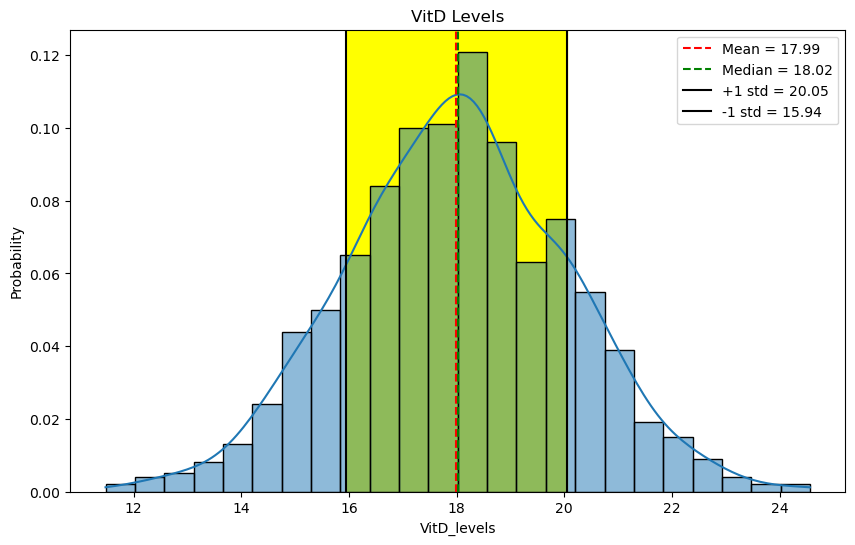

Kurtosis = 3.01
Skew = -0.00


In [6]:
## separating feature
feature = df["VitD_levels"]


## calculating stats
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std

## Creating the figure and plotting the histogram
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability',kde=True)

## Annotating Mean & Median
ax.axvline(mean, ls='--', color='red', label= f"Mean = {mean:.2f}") ## adding the values to label is optional - skipped here
ax.axvline(median, ls='--', color='green', label= f"Median = {median:.2f}") 


## Annotating +/- 1 std
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',zorder=0)


## Final Touches
ax.set_title('VitD Levels')
ax.legend();
plt.show()

## Calculate Kurtsis & Skew
kurt = stats.kurtosis(feature, fisher = False)
print(f'Kurtosis = {kurt:.2f}')

skew = stats.skew(feature)
print(f'Skew = {skew:.2f}')


- For VtD_levels:
    - The distribution is continuous.
    - It doesn't have skew.
    - It is Mesokurtic.

### Creating a Function for the Visualizations (Optional)

In [7]:
def plot_distribution(df, col):
    # Save col as feature
    feature = df[col].copy()

    ## calculating stats
    mean = feature.mean()
    median = feature.median()
    
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std

    
    ## Creating the figure and plotting the histogram
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax, stat='probability', kde=True)


    ## Annotating Mean & Median
    ax.axvline(mean, ls='--', color='red', label= f"Mean = {mean:.2f}") ## adding the values to label is optional - skipped here
    ax.axvline(median, ls='--', color='green', label= f"Median = {median:.2f}") 


    ## Annotating +/- 1 std
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow',zorder=0)


    ## Final Touches
    ax.set_title(f'{col}')
    ax.legend();
    plt.show()

    ## Calculate Kurtsis & Skew
    kurt = stats.kurtosis(feature, fisher = False)
    print(f'Kurtosis = {kurt:.2f}')

    skew = stats.skew(feature)
    print(f'Skew = {skew:.3f}')


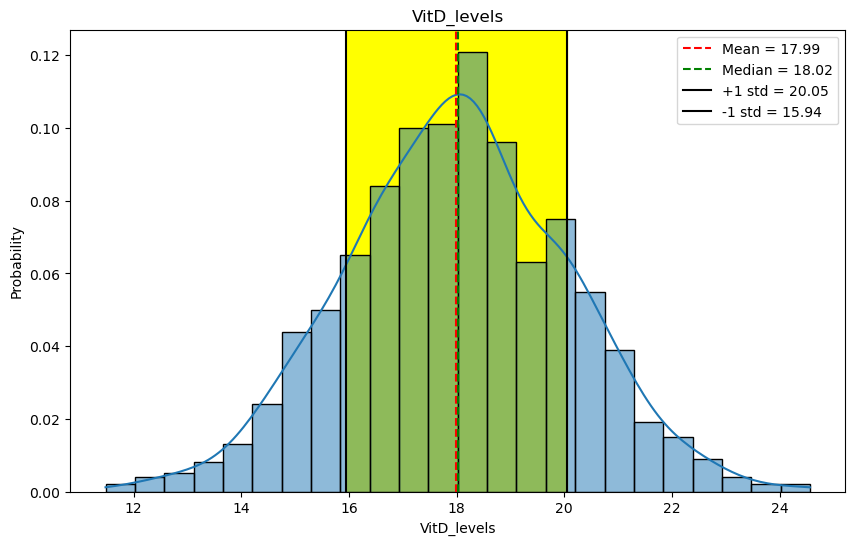

Kurtosis = 3.01
Skew = -0.000


In [9]:
## Test Function
plot_distribution(df, 'VitD_levels')

- For VtD_levels:
    - The distribution is continuous.
    - It doesn't have skew.
    - It is Mesokurtic.

## Doc_visits

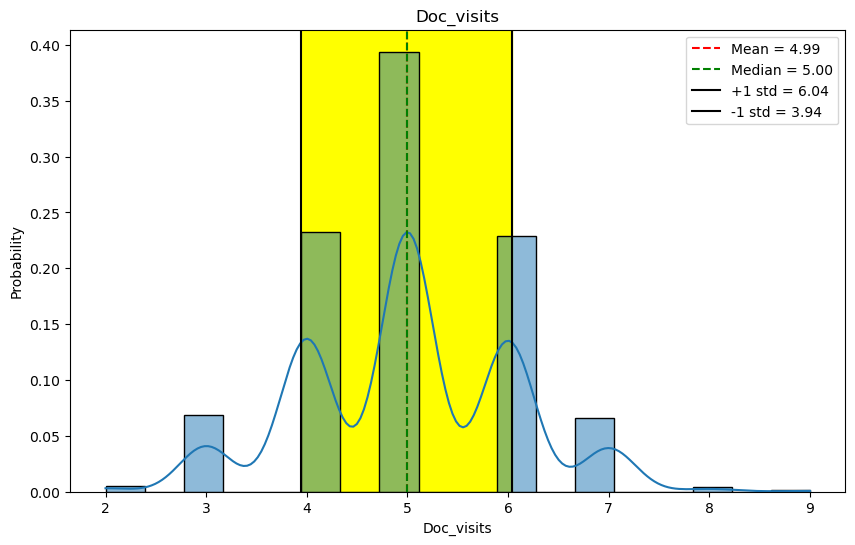

Kurtosis = 2.99
Skew = 0.032


In [10]:
plot_distribution(df, 'Doc_visits')

- For Doc_visits:
    - The distribution is discrete.
    - The distribution doesn't have significant skew.
    - The distribution is mesokurtic.

## TotalCharge

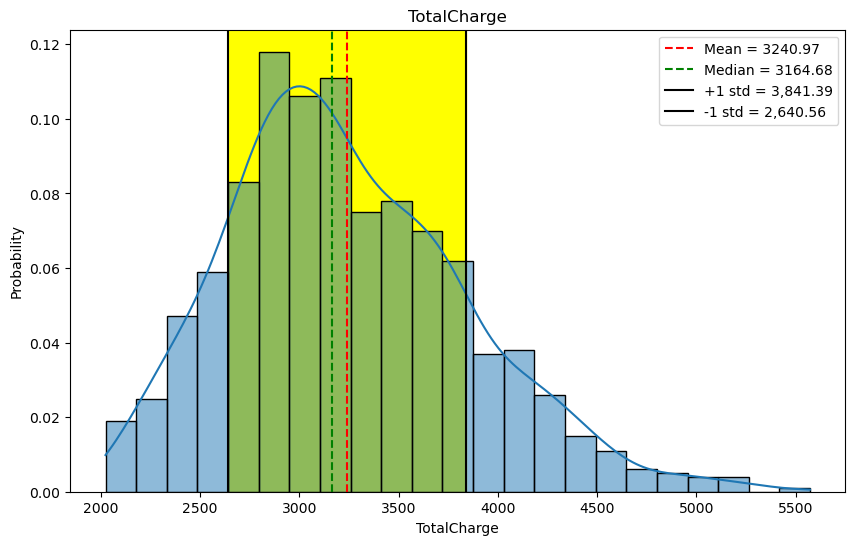

Kurtosis = 3.27
Skew = 0.584


In [11]:
plot_distribution(df, 'TotalCharge')

- For TotalCharge:
    - The distribution is continuous.
    - The distribution has a + (right) skew.
    - The distribution is mostly mesokurtic but somewhat leptokurtic.